# 3장 - 사이킷런을 타고 떠나는 머신 러닝 분류 모델 투어

### 목차

- 사이킷런 첫걸음: 퍼셉트론 훈련
- 로지스틱 회귀를 사용한 클래스 확률 모델링
  - 로지스틱 회귀의 이해와 조건부 확률
  - 로지스틱 비용 함수의 가중치 학습
  - 아달린 구현을 로지스틱 회귀 알고리즘으로 변경
  - 사이킷런을 사용하여 로지스틱 회귀 모델 훈련
  - 규제를 사용하여 과대적합 피하기
- 서포트 벡터 머신을 사용한 최대 마진 분류
  - 최대 마진
  - 슬랙 변수를 사용하여 비선형 분류 문제 다루기
  - 사이킷런의 다른 구현
초평면 찾기
- 결정 트리 학습
  - 정보 이득 최대화: 자원을 최대로 활용
  - 결정 트리 만들기
  - 랜덤 포레스트로 여러 개의 결정 트리 연결
- k-최근접 이웃: 게으른 학습 알고리즘

<br>

# 1. Scikit-learn
![scikit-learn logo.png](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)
- https://scikit-learn.org/stable/#
- 다양한 머신러닝 관련한 기술들을 통일되고 쉬운 인터페이스로 사용할수 있게 해주는 라이브러리
- 머신러닝 관련 알고리즘과 개발을 위한 프레임워크와 API 제공

### API 사용 방법

- 1) Scikit-Learn에서 적절한 estimator 클래스를 임포트해서 모델의 클래스 선택
- 2) 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택
- 3) 데이터를 특징 배열과 대상 벡터로 배치
- 4) 모델 인스턴스의 **fit()** 메서드로 모델을 데이터에 적용
- 5) 모델을 새 데이터에 적용
  + 지도 학습(분류, 회귀 등): **predict()** 메서드로 알려지지 않은 데이터에 대한 레이블 예측
  + 비지도 학습(차원 축소, 클러스터링, 피처 추출 등): **transform()**이나 **predict()** 메서드로 데이터의 특성을 변환하거나 추론. 
    - fit()과 transform()을 한번에 수행하는 fit_transform()도 존재.


### Estimator API
- 알고리즘이나 주요 피처를 추출, 필터링하는 사이킷런의 transformer
- 사이킷런은 알고리즘을 작성하는 방법을 통일된 방식으로 제공
- 알고리즘만 파이썬 클래스로 작성하고 
  데이터 세트는 표준 포맷(NumPy 배열, Pandas DataFrame, Scipy 희소 행렬)이기 때문에 가능
```
    estimator = Estimator(param1=1, param2=2)
    estimator.param1
```
- 효과: 
    - 사용법 단일화
    - 사용자 지정 파라미터에 대해 모델 API가 적절한 기본값을 제공

## scikit-learn이 제공하는 주요 모듈

| 모듈 | 설명 |
|------|------|
| sklearn.datasets | 내장 예제 세트 |
| sklearn.preprocessing |데이터 전처리 기능 모듈(변환, 정규화, 스케일링 등) |
| sklearn.feature_selection | 특성(feature)를 선택할 수 있는 기능 | 
| sklearn.feature_extraction | 특성(feature) 추출 |
| sklearn.decomposition | 차원 축소에 관한 알고리즘 지원 (PCA, NMF, Truncated SVD 등)
| sklearn.model_selection | 교차 검증을 위한 데이터를 학습/테스트용으로 분리, 최적 파라미터를 추출하는 API를 제공하는 모듈 (GridSearch 등)
| sklearn.metrics | 분류, 회귀, 클러스터링, Pairwise에 대한 다양한 성능 측정 방법에 관한 모듈 (Accuracy, Precision, Recall, ROC-AUC, RMSE 등) |
| sklearn.pipeline | 특성 처리 등의 변환과 ML 알고리즘 학습, 예측을 묶어서 실행할 수 있는 유틸리티 제공 |
| sklearn.linear_model | 선형 회귀, 릿지(Ridge), 라쏘(Lasso), 로지스틱 회귀 등 회귀 관련 알고리즘 및 SGD(Stochastic Gradient Descent) 알고리즘을 제공하는 모듈 |
| sklearn.svm | 서포트 벡터 머신 알고리즘 모듈 |
| sklearn.neighbors | 최근접 이웃 알고리즘 제공 모듈(k-NN 등)
| sklearn.naive_bayes | 나이브 베이즈 알고리즘 제공 모듈 (가우시안 NB, 다항 분포 NB 등) |
| sklearn.tree | 의사 결정 트리 알고리즘 모듈 |
| sklearn.ensemble | 앙상블 알고리즘 모듈 (Random Forest, AdaBoost, GradientBoost 등) |
| sklearn.cluster | 비지도 클러스터링 알고리즘 제공 모듈 (k-Means, 계층형 클러스터링, DBSCAN 등)

## 제공 데이터 셋

| 데이터 로드 함수 | 데이터설명	| 참고 |
|------|------|-|
| load_boston | 보스턴 집값 | 내장데이터  |
| load_diabetes | 당뇨병 자료 |  |
| load_linnerud | linnerud 자료 |  |
| load_iris | 붓꽃자료 |  |
| load_digits | 필기 숫자(digit)이미지 |  |
| load_wine | 포도주(wine) 등급 |  |
| load_breast_cancer | 유방암진단 자료 |  |
| fetch_california_housing | 캘리포니아 집값 자료 | 인터넷 다운로드 |
| fetch_covtype | 토지조사 자료 |  |
| fetch_20newsgroups | 뉴스 그룹 텍스트 자료 |  |
| fetch_olivetti_faces | 얼굴 이미지 자료 |  |
| fetch_lfw_people | 유명인 얼굴 이미지 |  |
| fetch_lfw_pairs | 유명인 얼굴 이미지 |  |
| fetch_rcv1 | 로이터 뉴스 말뭉치 |  |
| fetch_kddcup99 | Kddcup 99 Tcp dump |  |
| make_regression | 회귀분석용 | 가상데이터 |
| make_classification | 분류용 |  |
| make_blobs | 클러스터링용 |  |

- 데이터 형식: Bunch라는 클래스 객체로 생성 (dict와 유사)
    - data: (필수) 독립 변수 ndarray 배열
    - target: (필수) 종속 변수 ndarray 배열
    - feature_names: (옵션) 독립 변수 이름 리스트
    - target_names: (옵션) 종속 변수 이름 리스트
    - DESCR: (옵션) 자료에 대한 설명

## scikit-learn estimator cheet sheet
- 해결할 문제에 따른 적절한 알고리즘은 아래의 링크와 그림을 참고하여 결정하도록 권장합니다.

https://scikit-learn.org/stable/modules/classes.html



![](https://scikit-learn.org/stable/_static/ml_map.png)

In [ ]:
from IPython.display import Image

# 3.2 사이킷런 첫걸음

## 머신러닝 모델링 과정
데이터 전처리 -> 데이터 셋 분리 -> 모델 생성 및 학습 -> 예측 수행 -> 평가

## 지도학습(Supervised learning)
- 모델이 학습할 데이터(X)와 그에 맞는 정답 레이블(y)쌍을 데이터셋으로 구성하여 사용하는 학습 방법
- 사이킷런에 있는 모든 지도학습용 estimator는 **fit(X, y)** 형태로 학습하고 **predict(X)** 형태로 예측함.

- classification 문제라면 y는 특정 클래스, regression 문제라면 y는 연속적인 변수의 특정 값이 된다

In [ ]:
wine = datasets.load_wine()

In [ ]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

사이킷런에서 붓꽃 데이터셋을 적재합니다. 

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd 

iris = datasets.load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
# 사람이 관리하기 위해 df 하나 만들어둘게요 
irisDF = pd.DataFrame(data=iris.data, columns=iris.feature_names)
irisDF['label'] = iris.target

In [ ]:
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
type(iris)  # python의 dictionary와 유사한 자료형 

sklearn.utils._bunch.Bunch

![](https://miro.medium.com/max/1400/0*DKB-pJy7-G6gEkM-)

- Bunch 객체 형식으로 제공, keys() 함수로 key값 확인
- data속성 : 입력변수(학습에 필요한 특징들, Feature, 독립변수), 꽃받침 길이, 너비, 꽃입 길이, 너비로 예측 예정
- target속성 : 출력변수(답안, label, class, 종속변수)
- target_name 속성 : class 문자열 배열
- feature_namns : 입력 변수의 각 항목별 이름
- DESCR : 데이터셋에 대한 설명    

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=121)

In [ ]:
y_train.shape

(112,)

In [ ]:
y_train

array([0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0,
       0, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1,
       1, 2, 1, 0, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2,
       0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 0,
       2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1])

In [ ]:
X_test.shape

(50, 4)

In [ ]:
y_test

array([2, 1, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 2, 0, 1, 0,
       0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 1, 1,
       1, 0, 1, 2, 2, 0])

**1단계 : 데이터 셋 분리**

`sklearn.model_selection`의 `train_test_split`은 클래스 이름 그대로 **학습과 검증 (혹은 테스트) 셋**을 나누어 주는 역할을 합니다. 학습 (Train) / 검증 (Validation or Test) 세트로 나누며, 검증 세트로 1) **과대 적합**여부, 2) 모델의 성능 평가를 진행할 수 있습니다.

- 학습을 위한 다양한 피처와 분류 결정값인 레이블 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측
→ 지도학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식

- 학습 데이터(training data) 세트
    - 학습을 위해 주어진 데이터 세트
    - 많을수록 유리

- 테스트 데이터(test data) 세트
    - 머신러닝 모델의 예측 성능 평가를 위해 주어진 데이터 세트
    - 학습에 사용되지 않은 데이터이어야 함

- 검증 데이터(validation data) 세트
    - 학습 과정에서 학습을 중단할 시점을 결정하기 위해 사용하는 데이터 세트


**하이퍼파라미터 튜닝**

성능 향상을 위해서 개발자들이 직접 입력하는 수치값들 의미 <br>

**주요 hyperparameter**

* `test_size`: validation set에 할당할 비율 (20% -> 0.2), 기본값 0.25
* `stratify`: 분할된 샘플의 class 갯수가 동일한 비율로 유지
* `random_state`: 랜덤 시드값
* `shuffle`: 셔플 옵션, 기본값 True

하이퍼파라미터값 수정하면서 평가해 보기

70%는 훈련 데이터 30%는 테스트 데이터로 분할합니다:

In [ ]:
X = iris.data
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)

In [ ]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [36 34 35]
y_test의 레이블 카운트: [14 16 15]


In [ ]:
# shuffle = 시계열 데이터처럼 순차적으로 들어오는 데이터를 모델에 넣어야 할 때는 False
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121, shuffle=False)

In [ ]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [50 50  5]
y_test의 레이블 카운트: [ 0  0 45]


70%는 훈련 데이터 30%는 테스트 데이터로 분할합니다(계층화):

In [ ]:
# imbalanced data의 경우에는 statify=종속변수 기준
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121, stratify=y)

In [ ]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [ ]:
# imbalanced data의 경우에는 statify=종속변수 기준
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=121, stratify=y)

특성을 표준화합니다:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 차원(특성)별 평균, 차원별 분산을 0, 1 로 만들 준비가 되어있습니다 

In [ ]:
dir(scaler)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_reset',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'copy',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_params',
 'inverse_transform',
 'partial_fit',
 'set_output',
 'set_params',
 'transform',
 'with_mean',
 'with_std']

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
scaler.mean_

array([5.87678571, 3.09642857, 3.72857143, 1.19553571])

In [ ]:
dir(scaler)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_reset',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'copy',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_params',
 'inverse_transform',
 'mean_',
 'n_features_in_',
 'n_samples_seen_',
 'partial_fit',
 'scale_',
 'set_output',
 'set_params',
 'transform',
 'var_',
 'with_mean',
 'with_std']

In [ ]:
scaler.var_

array([0.64249681, 0.19016582, 3.10543367, 0.57114078])

In [ ]:
X_train_std = scaler.transform(X_train) # fit 한 평균, 분산 기준으로 데이터들의 특성을 변환해주는 함수 

In [ ]:
X_test_std = scaler.transform(X_test) # fit 했던 X_train의 평균, 분산 기준으로 X_test를 변환 

In [ ]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.01, random_state=121)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.01, random_state=121)

In [ ]:
ppn.predict(X_test_std)

array([1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1,
       2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0])

In [ ]:
y_test

array([1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1,
       2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2, 2, 0])

In [ ]:
print('정확도: %.3f' % ppn.score(X_test_std, y_test))

정확도: 0.868


In [ ]:
from sklearn.metrics import accuracy_score

print('정확도: %.3f' % accuracy_score(y_test, ppn.predict(X_test_std)))

정확도: 0.868


In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor=None if idx==1 else 'black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

# 실습
- X(iris.data, irisDF의 0번, 1번 특성만을 활용해서 70%는 훈련용으로 사용하는 X_train, X_test, y_train, y_test) 변수를 만들어보세요.
- random_state는 121로 지정합니다. 
- X_train과 X_test는 스탠다드스케일러를 사용하여 X_train_std, X_test_std 라는 변수에 다시 변경해서 넣습니다.
- Perceptron을 사용해서 0.01의 학습률, random_state=121로 분류기를 만들어보시시고, accuracy_score(정확도)를 확인해보세요.
- 하나의 코드셀에 작성합니다. 

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# 실습 - 코드셀 하나에 정리

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# 1. 데이터 불러오기
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# 2. 데이터 분리
# X(iris.data, 또는 irisDF의 2번, 3번 특성만을 활용해서 70%는 훈련용으로 사용하는 X_train, X_test, y_train, y_test) 변수를 만들어보세요.
# random_state는 121로 지정합니다. 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=121)

# 3. 전처리
# X_train과 X_test는 스탠다드스케일러를 사용하여 X_train_std, X_test_std 라는 변수에 다시 변경해서 넣습니다.
std_scaler = StandardScaler()
std_scaler.fit(X_train)

X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# 4. 모델 선정 및 학습
# Perceptron을 사용해서 0.01의 학습률, random_state=121로 분류기를 만들어보시고,
ppn = Perceptron(eta0= 0.01, random_state=121)
ppn.fit(X_train_std, y_train)

# 5. 예측
ppn.predict(X_test_std) # 모델의 예측치 

# 6. 정확도 평가 
# accuracy_score(정확도)를 확인해보세요.
print(ppn.score(X_test_std, y_test))
# 하나의 코드셀에 작성합니다. 

print(accuracy_score(y_test, ppn.predict(X_test_std)))

0.8888888888888888
0.8888888888888888


In [ ]:
ppn.score(X_test_std, y_test)

In [ ]:
y_test

array([1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0,
       2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

모델이 찾은 결정 경계와 산점도:

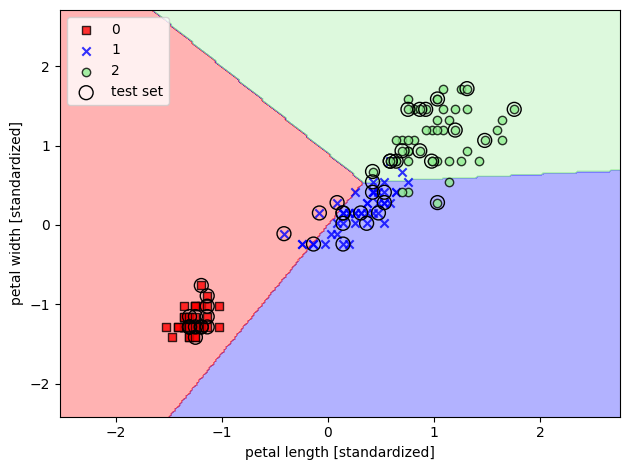

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()

<br>

# 3.3 로지스틱 회귀를 사용한 클래스 확률 모델링

## 3.3.1 로지스틱 회귀의 이해와 조건부 확률

# Logistic Regression

* 선형 회귀 방식을 이용한 **이진 분류** 알고리즘
* 분류 레이블 : 0 or 1
* 0~1 범위를 예측 결과로 가지는 모델 필요
    * Sigmoid 함수를 활용해 타깃값에 포함될 확률을 예측
* Logistic, sigmoid 함수
    * S자 모양의 함수

<center>
$\displaystyle s(z) = \frac{1}{1+e^{-z}}$

$z$ 값을 0과 1사이의 값으로 바꾸는 함수


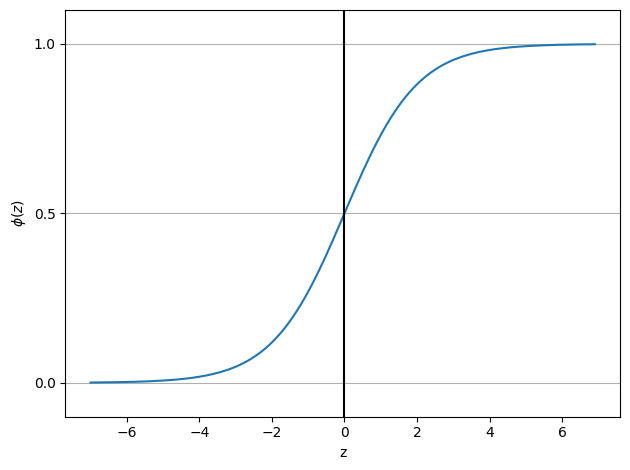

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('images/03_02.png', dpi=300)
plt.show()

예측 확률 : $\hat{y}=\begin{cases}1&\phi(z)\ge 0.5\mbox{ 일 때} \\ 0&\mbox{그 외}\end{cases}$
$\;\;\;\;\;$
$\hat y=\begin{cases}1&z\ge 0\mbox{ 일 때} \\ 0&\mbox{그 외}\end{cases}$

<br>

## 시그모이드 함수의 이해

$\frac{1}{1} = 1$인데, 분모 1에다 0보다 크거나 같은 어떤 수를 더 하면 그 결과는 1 보다 클수 없다.

분모에 더 할 값은 $e^{-z}$, 이 값은 어떤 $z$가 주어져도 0보다 작아 지지 않는다.

$e^{-z}$는 $z$의 값이 크면 클 수록 0에 가까운 작은 수가 되고 $z$값이 작으면 무한대에 가까운 큰 수가 된다

따라서 $z$의 값이 크면 $e^{-z}$의 값이 작아져서 $\frac{1}{1+e^{-z}}$의 값은 1에 가까워 지고 그 반대는 0에 가까워 진다.


## 3.3.2 로지스틱 비용 함수의 가중치 학습하기


* sklearn API
    * `sklearn.linear_model.LogisticRegression`

- 생성된 회귀 모델에 대한 평가를 위해 LinearRegression 객체에는 두 개의 속성 값을 간직합니다.
* intercept_: 추정된 상수항
* coef_: 추정된 가중치 벡터

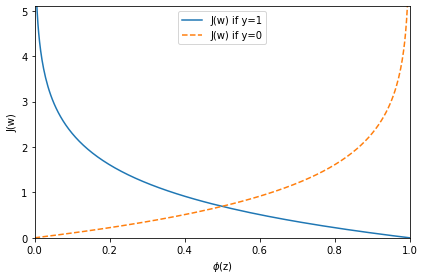

In [ ]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/03_04.png', dpi=300)
plt.show()

<br>

## 3.3.3 아달린 구현을 로지스틱 회귀 알고리즘으로 변경

In [ ]:
class LogisticRegressionGD(object):
    """경사 하강법을 사용한 로지스틱 회귀 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 로지스틱 비용 함수 값

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # 오차 제곱합 대신 로지스틱 비용을 계산합니다.
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """로지스틱 시그모이드 활성화 계산"""
        # 대신 from scipy.special import expit; expit(z) 을 사용할 수 있습니다.
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # 다음과 동일합니다.
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

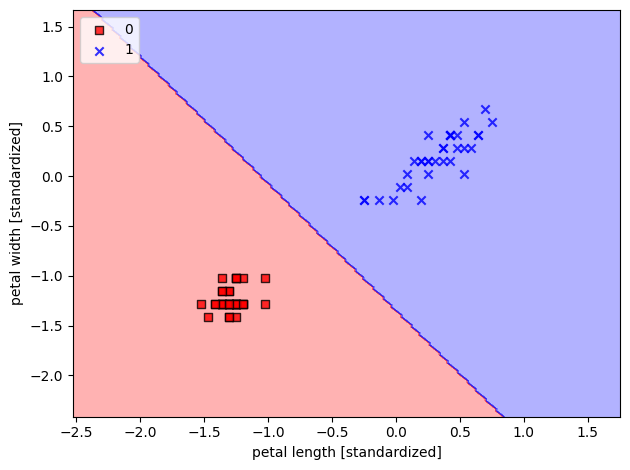

In [ ]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_05.png', dpi=300)
plt.show()

<br>

## 3.3.4 사이킷런을 사용해 로지스틱 회귀 모델 훈련하기

In [2]:

# 실습 - 코드셀 하나에 정리

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. 데이터 불러오기
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# 2. 데이터 분리
# X(iris.data, 또는 irisDF의 2번, 3번 특성만을 활용해서 70%는 훈련용으로 사용하는 X_train, X_test, y_train, y_test) 변수를 만들어보세요.
# random_state는 121로 지정합니다. 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=121)

# 3. 전처리
# X_train과 X_test는 스탠다드스케일러를 사용하여 X_train_std, X_test_std 라는 변수에 다시 변경해서 넣습니다.
std_scaler = StandardScaler()
std_scaler.fit(X_train)

X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# 4. 모델 선정 및 학습
# LogisticRegression Classifier을 사용해서 0.01의 학습률, random_state=121로 분류기를 만들어보시고,
lr_clf = LogisticRegression(random_state=121)
lr_clf.fit(X_train_std, y_train)

# 5. 예측
lr_clf.predict(X_test_std) # 모델의 예측치 

# 6. 정확도 평가 
# accuracy_score(정확도)를 확인해보세요.
print(lr_clf.score(X_test_std, y_test))
# 하나의 코드셀에 작성합니다. 

print(accuracy_score(y_test, lr_clf.predict(X_test_std)))

0.9333333333333333
0.9333333333333333


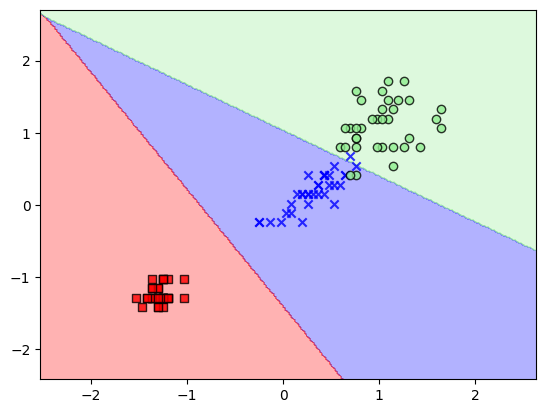

In [ ]:
plot_decision_regions(X_train_std, y_train, classifier=lr_clf)

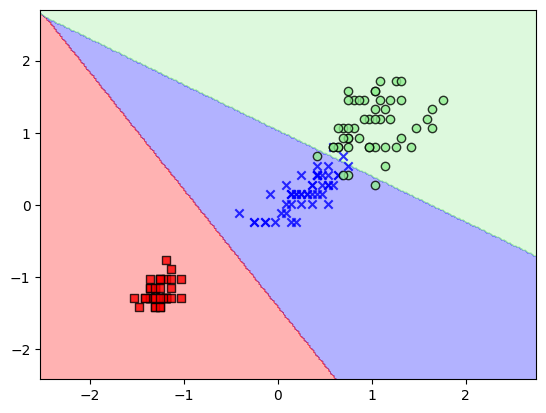

In [ ]:
plot_decision_regions(X_combined_std, y_combined, classifier=lr_clf)

In [ ]:
dir(lr_clf)

['C',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_prob

In [ ]:
lr_clf.predict(X_test_std)

array([1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0,
       1])

In [ ]:
lr_clf.predict(X_test_std).shape

(45,)

In [ ]:
lr_clf.predict_proba(X_test_std)

array([[1.41546358e-02, 7.70005239e-01, 2.15840125e-01],
       [4.96562148e-05, 4.57825362e-02, 9.54167808e-01],
       [1.06965550e-02, 6.59872582e-01, 3.29430863e-01],
       [9.48916729e-01, 5.10778615e-02, 5.40953897e-06],
       [9.60425817e-01, 3.95720688e-02, 2.11443789e-06],
       [6.56614212e-02, 8.81368655e-01, 5.29699239e-02],
       [9.17987215e-02, 8.58260349e-01, 4.99409300e-02],
       [1.82957989e-01, 8.04207351e-01, 1.28346603e-02],
       [4.84853918e-02, 8.50232899e-01, 1.01281710e-01],
       [1.02856993e-04, 6.20275414e-02, 9.37869602e-01],
       [2.79007077e-03, 3.96045461e-01, 6.01164469e-01],
       [5.28068552e-02, 8.69574334e-01, 7.76188105e-02],
       [2.17299425e-02, 8.36423015e-01, 1.41847042e-01],
       [9.57964529e-01, 4.20324734e-02, 2.99725693e-06],
       [9.44968877e-01, 5.50262629e-02, 4.85982232e-06],
       [1.69345088e-05, 2.54205489e-02, 9.74562517e-01],
       [9.84072333e-02, 8.77679942e-01, 2.39128246e-02],
       [9.44968877e-01, 5.50262

In [ ]:
lr_clf.predict_proba(X_test_std).shape

(45, 3)

<br>

In [ ]:
lr_clf.predict_proba(X_test_std).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
lr_clf.predict_proba(X_test_std).sum(axis=1).shape

(45,)

## 3.3.5 규제를 사용해 과대적합 피하기

- 머신러닝의 아이러니: 있는 데이터를 계속 보여주면서 패턴을 찾도록 학습을 시키는데(최적화, optimization), 파악해야 하는 것은 새로운 데이터(일반화, standardization)라는 것.

- 훈련데이터를 여러번 학습하다보면 어느순간부터 일반화를 못하는 시점이 와버립니다. 훈련 데이터에 특화된 패턴을 잘못 학습하기 시작하는 상태(과대적합)

- 데이터를 너무 안 학습시켜버리면(과소적합) 

- 새 데이터를 모아서 학습시키는 것... 쉽지 않죠
- 학습을 시킬 때 w1x1 + w2x2 + ....... w784x784 = y 네트워크의 복잡도에 제한을 구어서 가중치가 너무 큰 특성들은 줄여서 학습하도록 강제하는 것 : 규제

In [ ]:
Image(url='https://git.io/Jtm2V', width=700) 

L2 규제(L2 노름의 제곱) : $\lVert\boldsymbol{w}\rVert^2_2=\sum_{j=1}^m w_j^2$  - 회귀에 적용시에 Ridge라고 부릅니다 

L1 규제(L1 노름) : $\lVert\boldsymbol{w}\rVert_1=\sum_{j=1}^m \left|w_j\right|$ - 회귀에 적용시에 Lasso라고 부르고

규제가 추가된 비용 함수 : $J(\boldsymbol w)=-\sum^n_{i=1}\left[y^{(i)}\text{log}\phi(z^{(i)})+(1-y^{(i)})\text{log}\left(1-\phi(z^{(i)})\right)\right]+\dfrac{\lambda}{2}\sum_{j=1}^m w_j^2$

- `C`는 $\lambda$의 역수로 증가시키면 규제가 작아지고, 감소시키면 규제가 커짐. 기본값은 1.0
- `penalty` 매개변수 기본값 `'l2'`, L1 규제를 위해 `'l1'`을 지정할 수 있음.

![](https://d3qh61s7bu1xjw.cloudfront.net/wp-content/uploads/2021/01/01214555/ZvTXA.png)

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbBjxDk%2FbtqDsaLQDEi%2Fw3gNJ1rKUOWLfleyMwVRWk%2Fimg.png)

- 출처: https://rk1993.tistory.com/entry/Ridge-regression%EC%99%80-Lasso-regression-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0

In [6]:
# 실습 - 코드셀 하나에 정리

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. 데이터 불러오기
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# 2. 데이터 분리
# X(iris.data, 또는 irisDF의 2번, 3번 특성만을 활용해서 70%는 훈련용으로 사용하는 X_train, X_test, y_train, y_test) 변수를 만들어보세요.
# random_state는 121로 지정합니다. 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=121)

# 3. 전처리
# X_train과 X_test는 스탠다드스케일러를 사용하여 X_train_std, X_test_std 라는 변수에 다시 변경해서 넣습니다.
std_scaler = StandardScaler()
std_scaler.fit(X_train)

X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# 4. 모델 선정 및 학습
# LogisticRegression Classifier을 사용해서 0.01의 학습률, random_state=121로 분류기를 만들어보시고,
lr_clf = LogisticRegression(random_state=121, C=100, penalty="l2")
lr_clf.fit(X_train_std, y_train)

# 5. 예측
lr_clf.predict(X_test_std) # 모델의 예측치 

# 6. 정확도 평가 
# accuracy_score(정확도)를 확인해보세요.
print(lr_clf.score(X_test_std, y_test))
# 하나의 코드셀에 작성합니다. 

print(accuracy_score(y_test, lr_clf.predict(X_test_std)))

0.9555555555555556
0.9555555555555556


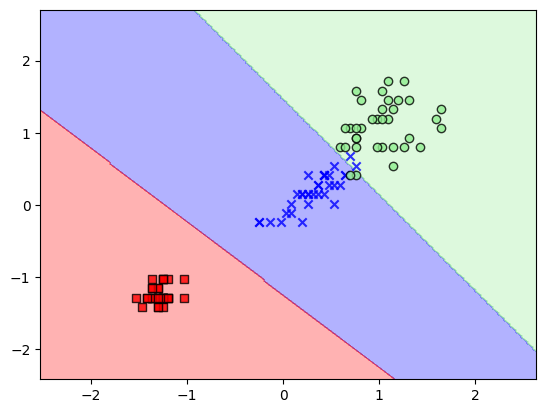

In [8]:
import numpy as np
plot_decision_regions(X_train_std, y_train, classifier=lr_clf)

<br>

In [ ]:
# 실습 - 코드셀 하나에 정리

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. 데이터 불러오기
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# 2. 데이터 분리
# X(iris.data, 또는 irisDF의 2번, 3번 특성만을 활용해서 70%는 훈련용으로 사용하는 X_train, X_test, y_train, y_test) 변수를 만들어보세요.
# random_state는 121로 지정합니다. 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=121)

# 3. 전처리
# X_train과 X_test는 스탠다드스케일러를 사용하여 X_train_std, X_test_std 라는 변수에 다시 변경해서 넣습니다.
std_scaler = StandardScaler()
std_scaler.fit(X_train)

X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# 4. 모델 선정 및 학습
# LogisticRegression Classifier을 사용해서 0.01의 학습률, random_state=121로 분류기를 만들어보시고,
# C: 규제의 강도를 조절하는 하이퍼파라미터, 역수로 동작함, 기본값은 1. 훈련데이터가 결정경계에 영향을 미치는 가중치를 조절. 
lr_clf = LogisticRegression(random_state=121, C=1, penalty="l2")
lr_clf.fit(X_train_std, y_train)

# 5. 예측
lr_clf.predict(X_test_std) # 모델의 예측치 

# 6. 정확도 평가 
# accuracy_score(정확도)를 확인해보세요.
print(lr_clf.score(X_test_std, y_test))
# 하나의 코드셀에 작성합니다. 

print(accuracy_score(y_test, lr_clf.predict(X_test_std)))

0.9333333333333333
0.9333333333333333


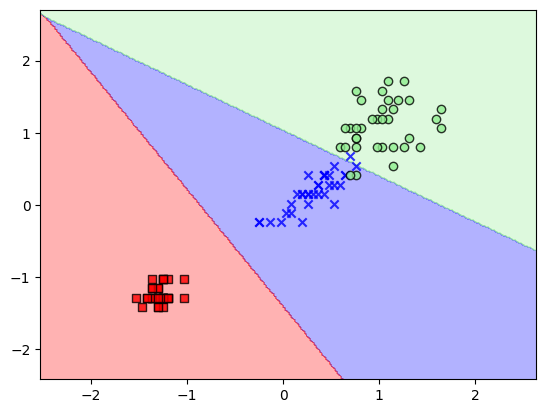

In [ ]:
plot_decision_regions(X_train_std, y_train, classifier=lr_clf)

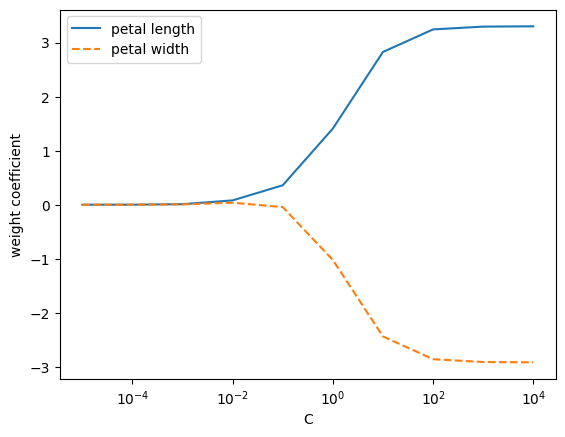

In [9]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('images/03_08.png', dpi=300)
plt.show()

# 3.4 서포트 벡터 머신을 사용한 최대 마진 분류

In [ ]:
Image(url='https://git.io/Jtm2r', width=700) 

## 3.4.1 최대 마진

양성 쪽 초평면 : $w_0+\boldsymbol{w}^T\boldsymbol{x}_{pos}=1$

음성 쪽 초평면 : $w_0+\boldsymbol{w}^T\boldsymbol{x}_{neg}=-1$

두 식을 빼고 : $\boldsymbol{w}^T(\boldsymbol{x}_{pos}-\boldsymbol{x}_{neg})=2$

가중치의 L2 노름으로 나눈다 : $\dfrac{\boldsymbol{w}^T(\boldsymbol{x}_{pos}-\boldsymbol{x}_{neg})}{\lVert \boldsymbol w \rVert}=\dfrac{2}{\lVert \boldsymbol w \rVert}$

결국 SVM은 $\dfrac{2}{\lVert \boldsymbol w \rVert}$을 최대화하는 문제이다. 실제로는 $\dfrac{1}{2}\lVert \boldsymbol w \rVert^2=\dfrac{1}{2}\boldsymbol w^T \boldsymbol w$를 최소화한다.

## 3.4.2 슬랙 변수를 사용하여 비선형 분류 문제 다루기

- 어느정도 에러가 발생하는 것을 허용하면서 초평면(hyperplane)을 찾는 방법을 말합니다.
- SVM에서는 일반적으로 분류를 위한 마진(Margin)을 설정하게 되는데, 이 때 마진과 학습 오류의 개수는 반비례 관계를 가지며 어떻게 분류할 것인지는 목적에 따라 결정됩니다. 여기서 선형적으로 분류할 수 없는 경우에는 분류를 위해 오차를 허용할 수 있습니다. 이 때 **제약조건(constraint)를 완화하여 오차를 허용하기 위한 변수(가변적인 수)를 슬랙변수**라고 합니다.

 
- Slack Variable은 각 관측치의 에러 정도를 나타내는 역할을 하게 되는데 각 관측치 마다 Slack Variable이 하나씩 존재합니다.  

- 분류가 올바르게 된 경우: Slack Variable = 0
- 분류를 위한 마진을 허용하는 경우: 0 < Slack Variable < 1 
- 분류가 제대로 안된 경우: Slack Variable > 1

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fc4nBIJ%2FbtrJBcQxBEZ%2FTyUECKIcy7rweoC8iJi1Fk%2Fimg.png" width=400>
<img src="https://mblogthumb-phinf.pstatic.net/MjAyMjAzMDdfMjA1/MDAxNjQ2NjMxOTM2MTI2.cWKNQtf96DbJUV5Jv0wTRZibfcU7IsqbiKc7xtPlw3Ag.bWiX1vh-w-vXqjy6WO6jaRNNnNrpZ76FP9357ixKrKMg.PNG.yygg9800/image.png?type=w800">

- 수식으로 표현하면 아래와 같습니다:

양성 샘플일 때 : $w_0+\boldsymbol w^T \boldsymbol x^{(i)} \ge 1-\zeta^{(i)}$

음성 샘플일 때 : $w_0+\boldsymbol w^T \boldsymbol x^{(i)} \le -1+\zeta^{(i)}$

목적 함수 : $\dfrac{1}{2} \boldsymbol w^T \boldsymbol w+C\sum_i \zeta^{(i)}$

- 여기에 규제까지 더한다면?

In [ ]:
Image(url='https://git.io/Jtm26', width=600) 

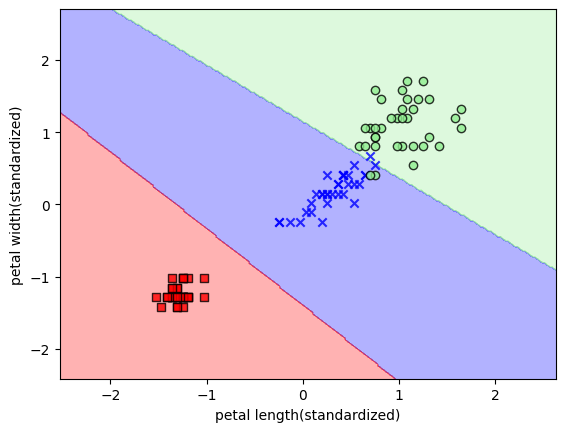

In [12]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_train_std, y_train, classifier=svm)
plt.xlabel('petal length(standardized)')
plt.ylabel('petal width(standardized)')

plt.show()

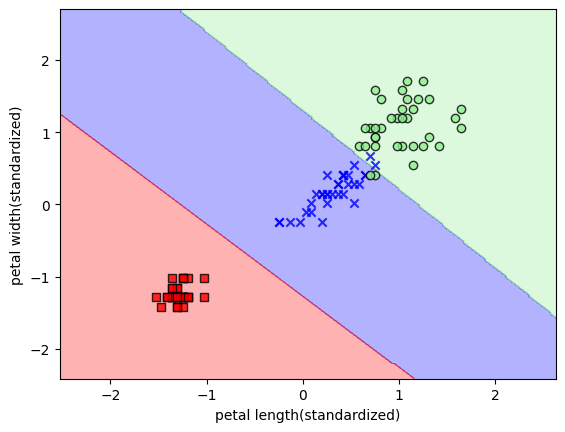

In [13]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=100, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_train_std, y_train, classifier=svm)
plt.xlabel('petal length(standardized)')
plt.ylabel('petal width(standardized)')

plt.show()

## 3.4.3 사이킷런의 다른 구현

In [25]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
ppn.fit(X_train_std, y_train)
pred = ppn.predict(X_test_std)

In [26]:
pred

array([1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 2,
       1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0,
       2])

In [27]:
lr = SGDClassifier(loss='log')
lr.fit(X_train_std, y_train)
pred = lr.predict(X_test_std)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [28]:
 lr.predict(X_test_std)

array([1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 2,
       1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0,
       2])

In [29]:
 lr.predict_proba(X_test_std)

array([[1.46263342e-04, 8.56364500e-01, 1.43489237e-01],
       [8.49669641e-09, 7.32479651e-05, 9.99926744e-01],
       [7.90895989e-05, 5.69558715e-02, 9.42965039e-01],
       [7.31119195e-01, 2.68880805e-01, 1.38348363e-30],
       [5.37378911e-01, 4.62621089e-01, 3.61321866e-32],
       [5.69607236e-03, 9.94303506e-01, 4.21155109e-07],
       [9.45830578e-02, 9.05416683e-01, 2.58783194e-07],
       [5.47174643e-02, 9.45282536e-01, 6.50772904e-12],
       [2.41535490e-02, 9.75733851e-01, 1.12600234e-04],
       [2.35892599e-08, 3.04272537e-05, 9.99969549e-01],
       [1.15535796e-06, 2.22503700e-03, 9.97773808e-01],
       [8.44694317e-03, 9.91542378e-01, 1.06784588e-05],
       [2.23392228e-04, 9.96970166e-01, 2.80644217e-03],
       [6.17006309e-01, 3.82993691e-01, 1.21132143e-31],
       [5.72409423e-01, 4.27590577e-01, 1.22444338e-30],
       [2.42280656e-09, 4.67603557e-05, 9.99953237e-01],
       [3.77837942e-03, 9.96221620e-01, 9.56296312e-10],
       [5.72409423e-01, 4.27590

In [30]:
svm = SGDClassifier(loss='hinge')
svm.fit(X_train_std, y_train)
pred = svm.predict(X_test_std)
pred

array([1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 2,
       1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0,
       1])

# 3.5 커널 SVM을 사용하여 비선형 문제 풀기

## 3.5.1 선형적으로 구분되지 않는 데이터를 위한 커널 방법

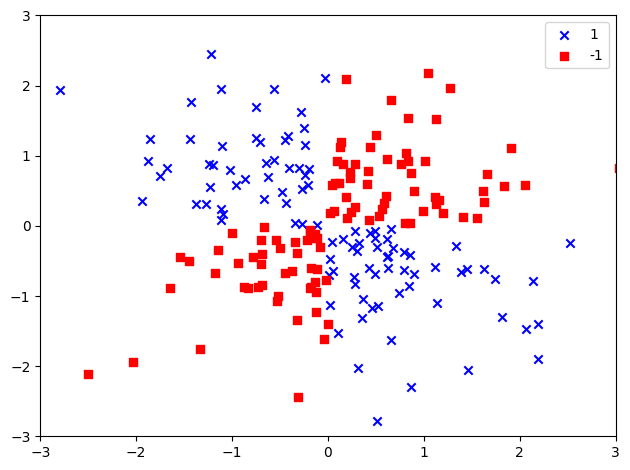

In [31]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/03_12.png', dpi=300)
plt.show()

$\phi(x_1, x_2)=(x_1, x_2, x_1^2+x_2^2)$

In [ ]:
Image(url='https://git.io/Jtm2X', width=700) 

<br>

## 3.5.2 커널 기법을 사용해 고차원 공간에서 분할 초평면 찾기

방사 기저 함수(Radial Basis Function) : $K(\boldsymbol x^{(i)}, \boldsymbol x^{(j)})=\text{exp}\left(-\dfrac{1}{2\sigma^2}\lVert \boldsymbol x^{(i)}-\boldsymbol x^{(j)} \rVert^2\right)=\text{exp}\left( -\gamma\lVert \boldsymbol x^{(i)}-\boldsymbol x^{(j)} \rVert^2 \right)$

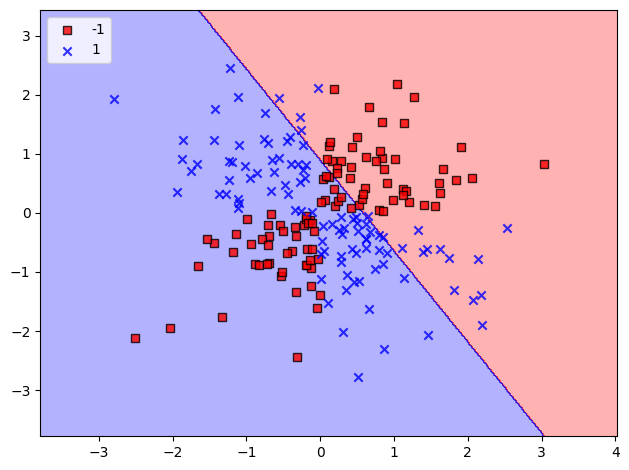

In [39]:
svm = SVC(kernel='linear', random_state=1)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_14.png', dpi=300)
plt.show()

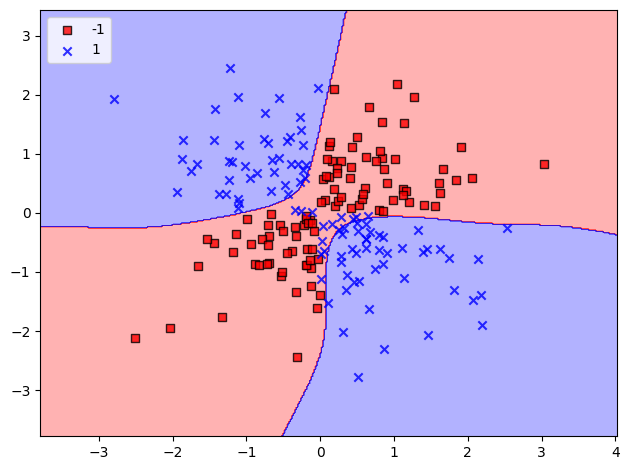

In [38]:
svm = SVC(kernel='rbf', random_state=1)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_14.png', dpi=300)
plt.show()

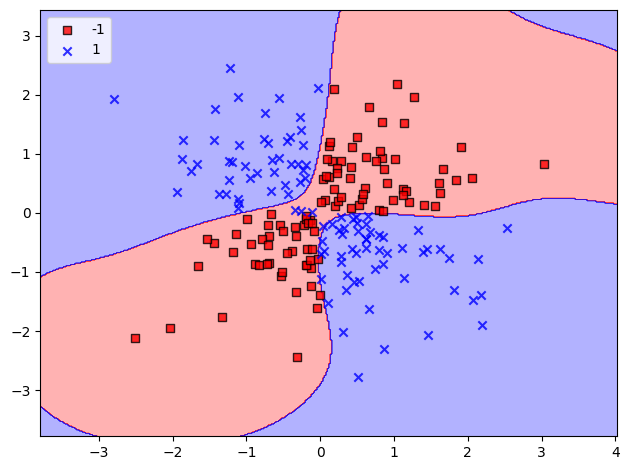

In [36]:
svm = SVC(kernel='rbf', random_state=1, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_14.png', dpi=300)
plt.show()

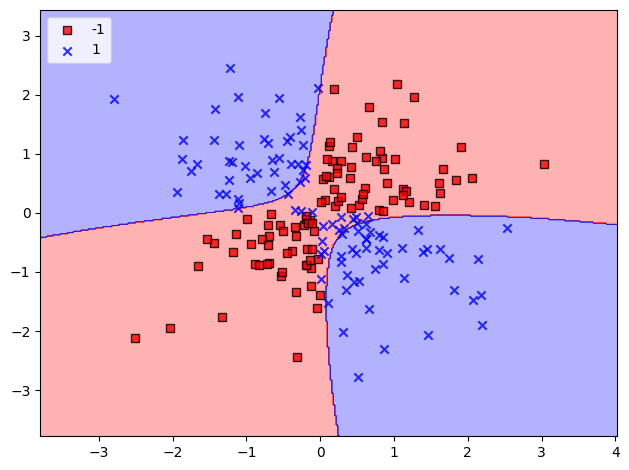

In [42]:
# C=10, gamma=0.1
svm = SVC(kernel='rbf', random_state=1, C=10.0, gamma=0.1)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_14.png', dpi=300)
plt.show()

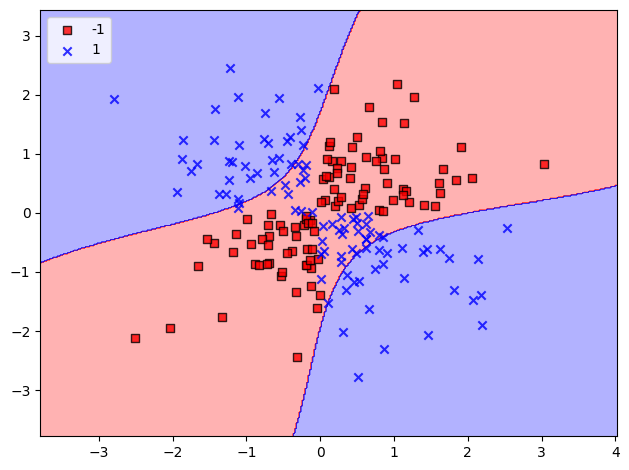

In [45]:
# C=10, gamma=0.1
svm = SVC(kernel='rbf', random_state=1, gamma=0.1)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_14.png', dpi=300)
plt.show()

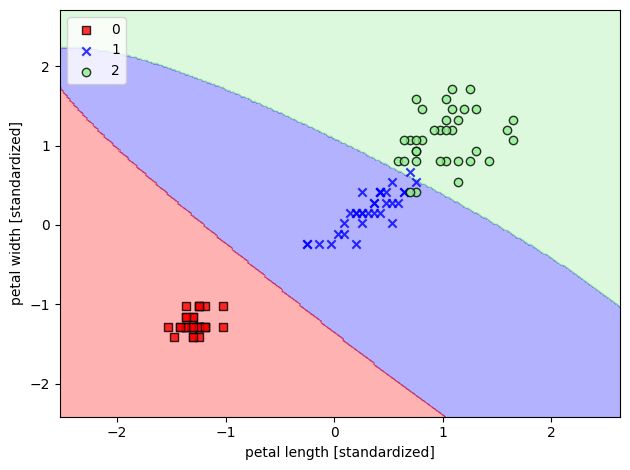

In [48]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_train_std, y_train,
                      classifier=svm)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_15.png', dpi=300)
plt.show()

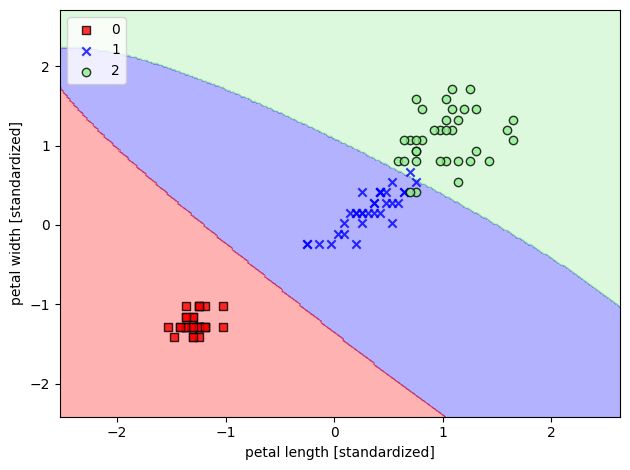

In [54]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_train_std, y_train, 
                      classifier=svm)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_16.png', dpi=300)
plt.show()

<br>

# 3.6 결정 트리(Decision Tree) 학습

In [ ]:
Image(url='https://git.io/Jtm21', width=500) 

<br>

## 3.6.1 정보 이득 최대화 - 자원을 최대로 활용하기

## 결정트리(decision tree) 알고리즘

1. 데이터에 있는 규칙을 학습을 통해 자동으로 찾아 tree 기반의 분류 규칙 적용
2. 트리를 어떻게 분할할 것인가가 중요

**결정트리에 사용되는 CART 알고리즘**
- 노드를 왼쪽, 오른쪽 자식 노드로 분할 확장하면서 트리를 생성
- 분할 단계에서 가장 중요한 특징과 해당 값의 모든 가능한 조합을 측정 함수를 이용해 탐욕적으로 측정함. 
- 범주형 특징은 해당 특징 값을 가진 샘플들을 오른쪽 자식 노드에 할당
- 수치형 특징의 경우 해당 값보다 큰 값을 가진 샘플들을 오른쪽 자식 노드에 할당함

**그래프 구조**

1. root 노드 : 최상위 node
2. 규칙 노드(Decision Tree) = 규칙 조건
3. 리프 노드 = 결정된 클래스값  (리프노드에 도달하면 더이상 자식 노드가 없다)

<hr>

**주의사항**

1. tree 깊이가 깊어질수록 결정 tree의 예측 성능이 저하될 수도 있음
2. 가급적 최대한 균일한 데이터 세트를 구성할 수 있도록 분할할 수 있게 해야 함



**graphic에 표현된 문구들**

1. gini : value=[]로 주어진 데이터 분포의 지니계수
2. samples : 한 규칙에 해당하는 데이터 건수
3. value = [] : 클래스 값 기반의 데이터 건수

**균일도 측정 방법**

1. 균일도가 높은 동일한 형식들의 데이터들로 구성되어 있다로 간주
2. 가령 : 검정색 바둑알로만 되어 있으면 균일도가 높음, 검정색 바둑알에 흰색에 조금 섞여 있다면 균일도가 중간, 흰색이 너무 많다는 건 균일도가 낮다로 간주
3. 결정노드는 정보를 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙을 구성한다

**원리 : 균일도가 높은 데이터화**

1. 지니 계수 사용 : 균일도 측정하는 방법
2. 지니 계수란? 경제학에서 불평등 지수를 나타낼 때 사용하는 계수, 0에 가까울수록 가장 평등하고, 1에 가까울수록 불평등
3. sklearn API 관점 : 데이터 세트를 분할하는데 가장 좋은 조건, 즉 정보 이득이나 지니계수가 높은 조건을 찾아서 자식 tree node에 반복적으로 분할한 뒤 데이터가 모두 특정 분류에 속하게 되면 분할 stop 후 결정

# 지니계수
- 공평하게 섞여 있을 수록 지니 계수는 올라감
- Decision Tree는 지니 불순도를 낮추는 방향으로 가지치기를 진행

In [ ]:
Image(url='https://git.io/Jtm2D', width=500) 

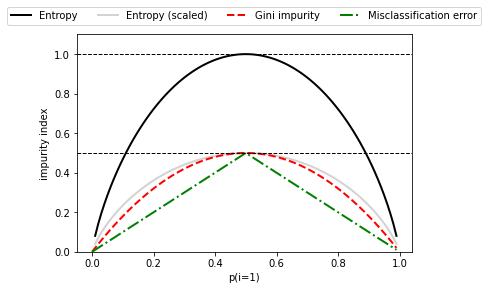

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
# plt.savefig('images/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

<br>

## 3.6.2 결정 트리 만들기

In [56]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [57]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)  # 교차검증 clf에 X, y를 넣고 10번 acurracy를 측정한 결과

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [61]:
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=121, test_size=0.3, stratify=y, shuffle=True)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [63]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [65]:
pred = tree_clf.predict(X_test)

In [66]:
tree_clf.score(X_test, y_test) # 정확도

0.9333333333333333

In [67]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred) # 위와 같음

0.9333333333333333

In [ ]:
X_combined

In [71]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

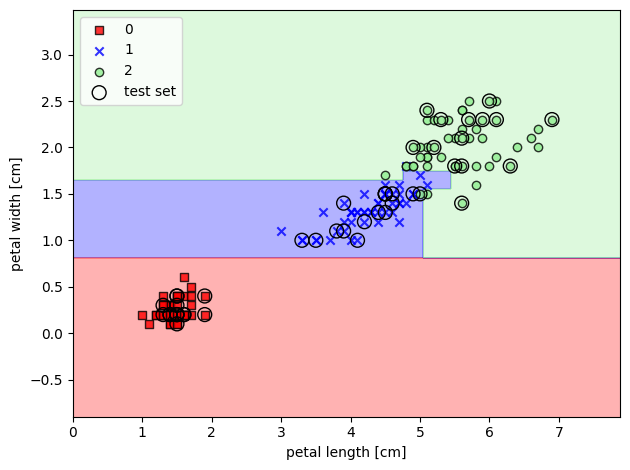

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1. 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target

# 2. 데이터 split 및 처리 (전체 4개 차원 중에 petal width, petal length 2개만 사용)
X_train, X_test, y_train, y_test = train_test_split(X[:, 2:], y, random_state=121, test_size=0.3, stratify=y, shuffle=True)

# 3. 의사결정나무 모델 생성 
tree_clf = DecisionTreeClassifier(random_state=0)

# 4. 의사결정나무 모델 학습
tree_clf.fit(X_train, y_train)

# 5. 성능 측정
tree_clf.score(X_test, y_test) # 정확도

# 6. 결정 경계 확인 
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_clf,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [77]:
import pandas as pd

X_train_df = pd.DataFrame(X_train, columns=['petal_length', 'petal_width'])
X_train_df['label'] = y_train
X_train_df.describe()

,petal_length,petal_width,label
count,105.000000,105.000000,105.000000
mean,3.741905,1.200952,1.000000
std,1.769658,0.757335,0.820413
min,1.000000,0.100000,0.000000
25%,1.600000,0.300000,0.000000
50%,4.300000,1.300000,1.000000
75%,5.100000,1.800000,2.000000
max,6.700000,2.500000,2.000000


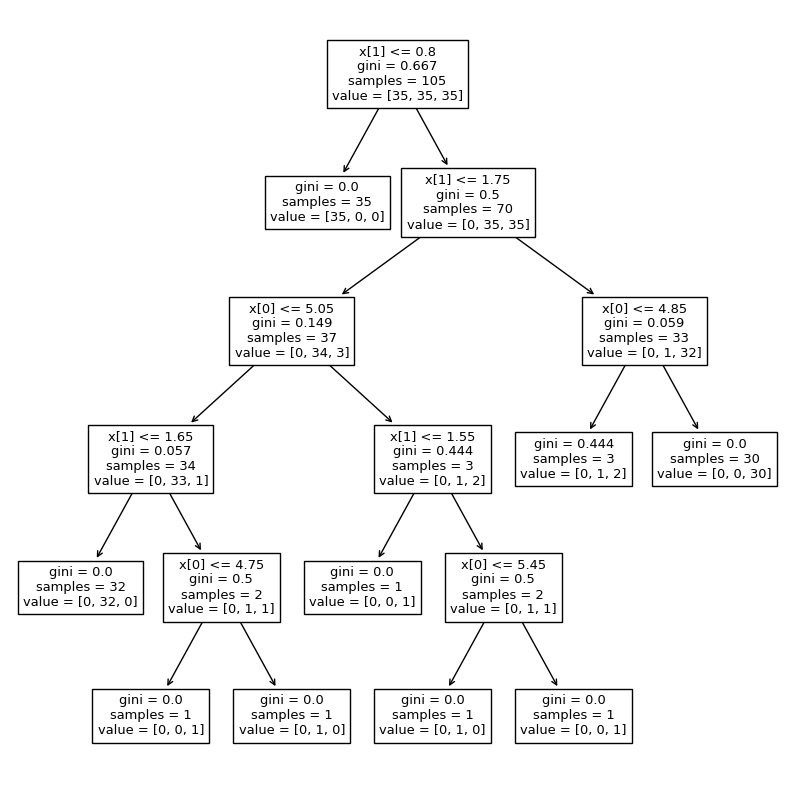

In [74]:
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(tree_clf)
plt.show()

# graphic에 표현된 문구들
# gini : value=[]로 주어진 데이터 분포의 지니계수
# samples : 한 규칙에 해당하는 데이터 건수
# value = [] : 클래스 값 기반의 데이터 건수

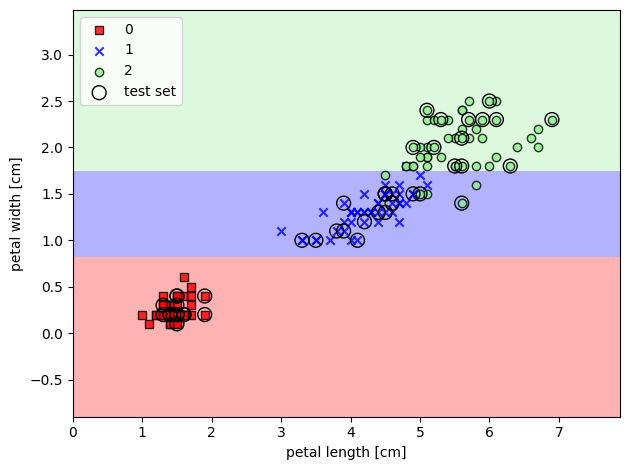

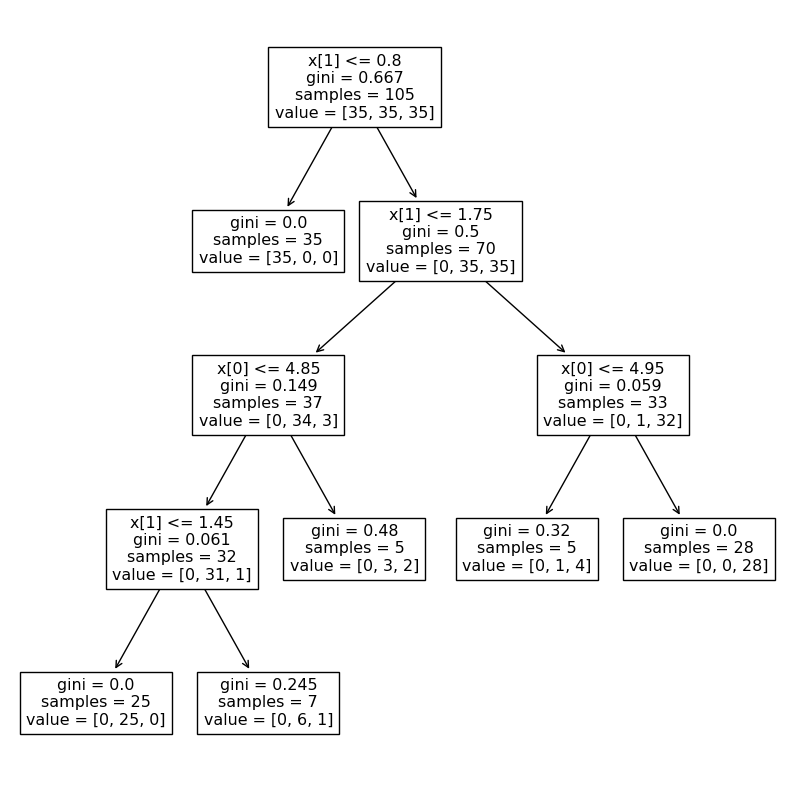

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 1. 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target

# 2. 데이터 split 및 처리 (전체 4개 차원 중에 petal width, petal length 2개만 사용)
X_train, X_test, y_train, y_test = train_test_split(X[:, 2:], y, random_state=121, test_size=0.3, stratify=y, shuffle=True)

# 3. 의사결정나무 모델 생성 
tree_clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=5)

# 4. 의사결정나무 모델 학습
tree_clf.fit(X_train, y_train)

# 5. 성능 측정
tree_clf.score(X_test, y_test) # 정확도

# 6. 결정 경계 확인 
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_clf,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 7. 수형도 생성

plt.figure(figsize=(10,10))
tree.plot_tree(tree_clf)
plt.show()


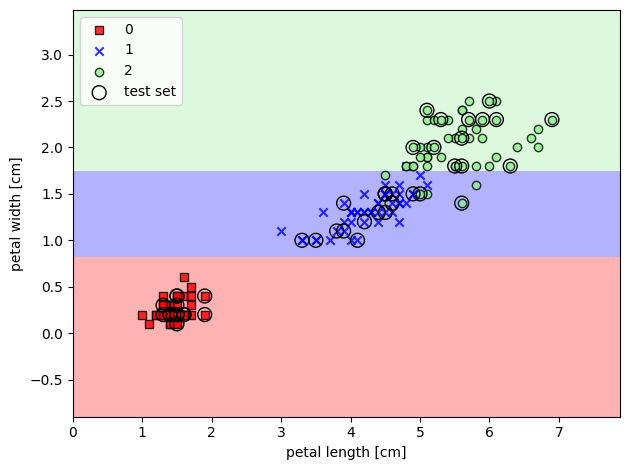

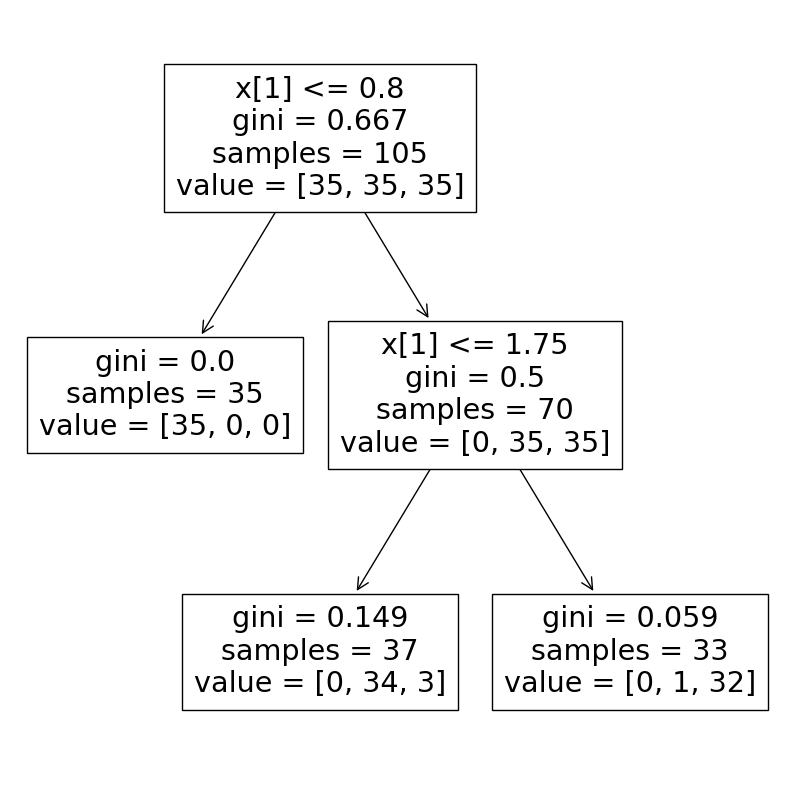

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 1. 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target

# 2. 데이터 split 및 처리 (전체 4개 차원 중에 petal width, petal length 2개만 사용)
X_train, X_test, y_train, y_test = train_test_split(X[:, 2:], y, random_state=121, test_size=0.3, stratify=y, shuffle=True)

# 3. 의사결정나무 모델 생성 
tree_clf = DecisionTreeClassifier(random_state=0, max_depth=2)

# 4. 의사결정나무 모델 학습
tree_clf.fit(X_train, y_train)

# 5. 성능 측정
tree_clf.score(X_test, y_test) # 정확도

# 6. 결정 경계 확인 
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_clf,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 7. 수형도 생성

plt.figure(figsize=(10,10))
tree.plot_tree(tree_clf)
plt.show()


```
sklearn.tree.plot_tree 함수는 scikit-learn에서 제공하는 의사 결정 트리의 시각화 도구입니다. 다음은 plot_tree 함수의 주요 하이퍼파라미터입니다.

decision_tree: 시각화할 DecisionTreeClassifier 또는 DecisionTreeRegressor 객체입니다.
max_depth: 표시할 최대 깊이입니다. None으로 설정하면 모든 노드가 표시됩니다. 기본값은 None입니다.
feature_names: 각 특성의 이름을 지정하는 문자열의 리스트입니다. 기본값은 None입니다.
class_names: 각 클래스의 이름을 지정하는 문자열의 리스트입니다. 기본값은 None입니다.
label: 노드에 표시될 레이블의 유형입니다. 기본값은 'all'입니다. 다른 유형으로는 'root' (루트 노드에만 레이블 표시), 'none' (노드에 레이블 표시 안 함)이 있습니다.
filled: 노드 색칠 여부입니다. 기본값은 False입니다.
fontsize: 노드 및 텍스트의 글꼴 크기입니다. 기본값은 12입니다.
rounded: 노드 모서리를 둥글게 할지 여부입니다. 기본값은 False입니다.
precision: 노드 텍스트에 표시할 소수점 자릿수입니다. 기본값은 2입니다.
ax: 플롯을 그릴 matplotlib 축 객체입니다. 기본값은 None입니다.
예를 들어, 다음 코드는 iris 데이터셋에 대한 의사 결정 트리를 시각화하며, 모든 노드에 레이블을 표시하고, 색칠하고, 노드 이름을 둥글게 표시합니다.
```

In [85]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

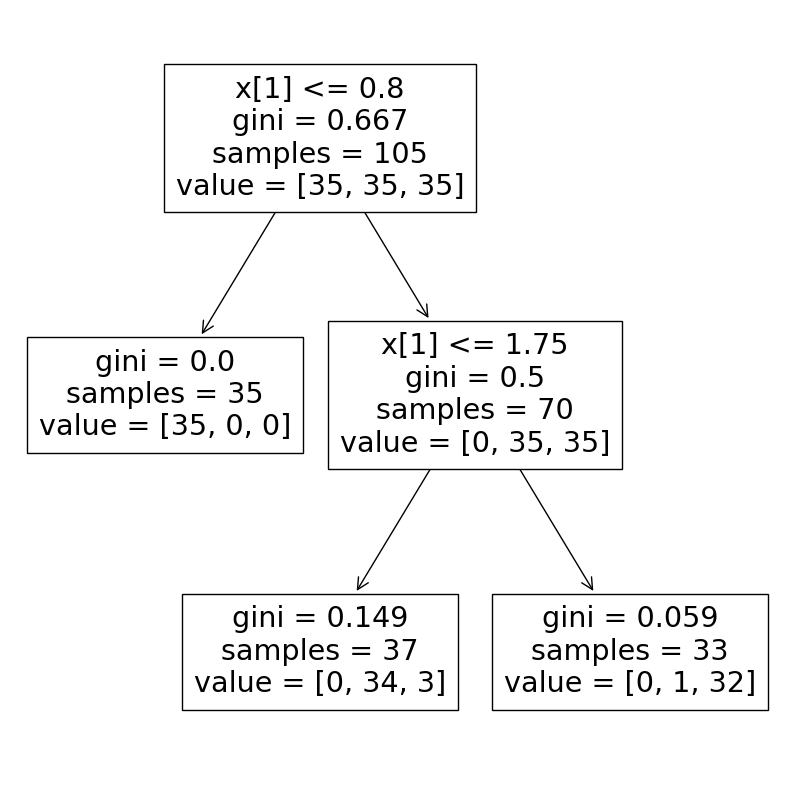

In [82]:
plt.figure(figsize=(10,10))
tree.plot_tree(tree_clf, rounded=True, feature_names=['petal length', 'petal width'], class_names=['setosa', 'versicolor', 'virginica'], filled=True, precision=2)
plt.show()


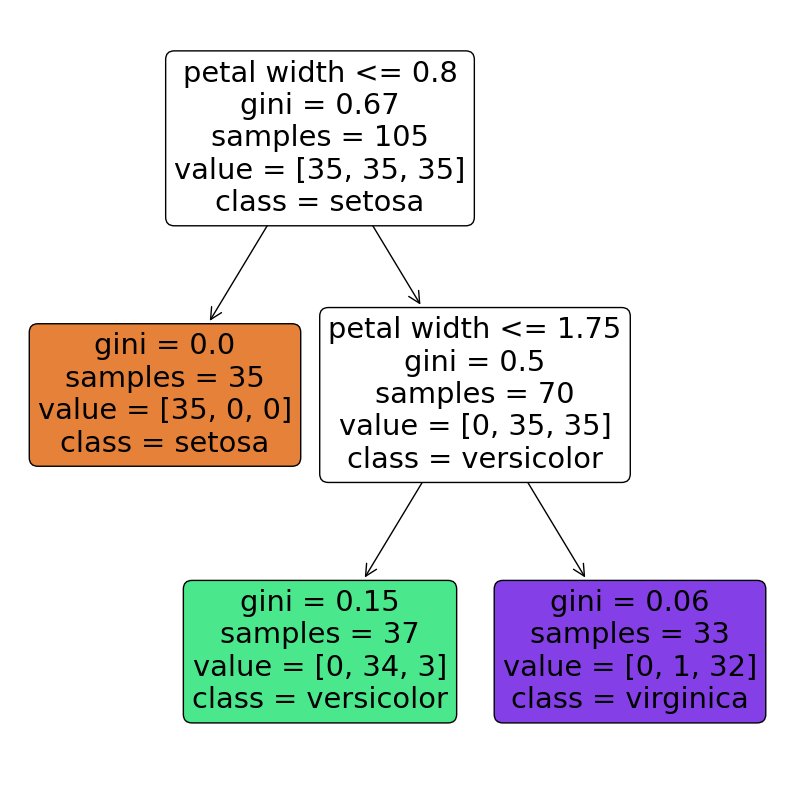

In [88]:
plt.figure(figsize=(10,10))
tree.plot_tree(tree_clf, rounded=True, feature_names=['petal length', 'petal width'], class_names=['setosa', 'versicolor', 'virginica'], filled=True, precision=2)
plt.show()


In [ ]:
Image(url='https://git.io/Jtm2H', width=600) 

<br>

## 3.6.3 랜덤 포레스트로 여러 개의 결정 트리 연결하기
- 여러개의 트리모델을 연결해서 그 평균을 내어서 사용하는 방법
- 예측력 뿐 아니라 일반화정도에 대해 트리모델 1개를 사용하는 것보다 안정성이 담보된다(견고한 모델)
- 해석은 결정트리만큼 쉽지 않음. 하지만 하이퍼파라미터 튜닝을 많이 하지 않아도 되는 장점
- 트리개수가 많을수록 성능은 좋아지지만 계산비용이 증가합니다

- 여러개의 모델을 연결해서 최종 성능을 만들어내는 방법 : 앙상블 기법 

In [89]:
from sklearn.datasets import make_classification  # 임의의 난수를 생성해주는 함수

X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
print(clf.predict([[0, 0, 0, 0]]))

[1]


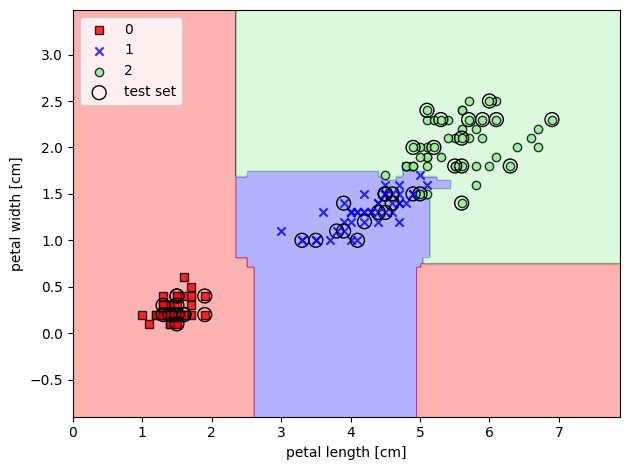

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# 1. 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target

# 2. 데이터 split 및 처리 (전체 4개 차원 중에 petal width, petal length 2개만 사용)
X_train, X_test, y_train, y_test = train_test_split(X[:, 2:], y, random_state=121, test_size=0.3, stratify=y, shuffle=True)

# 3. 의사결정나무 모델 생성 
random_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# 4. 의사결정나무 모델 학습
random_clf.fit(X_train, y_train)

# 5. 성능 측정
random_clf.score(X_test, y_test) # 정확도

# 6. 결정 경계 확인 
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=random_clf,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


<br>

# 3.7 K-최근접 이웃: 게으른 학습 알고리즘

In [107]:
# w1x1 + w2x2 + w3x3 + b = y  
# 모수모델 
# 새 데이터가 들어가면 그 데이터를 현재의 파라미터에 적용하기 위한(학습) 시간이 걸림
# 파라미터의 수가 고정되어있음  

# 비모수모델
# 파라미터가 고정되어 있지 않음
# 들어온 데이터자체를 메모리에 저장하는 모델 
# 고정되어있지 않은 파라미터를 가지고 있는 모델 
# 주변에 있는 이미 기억하고 있는 데이터 n개와 비교해서 새로 들어온 데이터를 분류 
# k=4, 2:2 0 1 
# -> 다수결로 분류하기 애매할 때는 거리를 계산합니다 
# -> 우연히 거리도 똑같다면?? 먼저 들어왔던 훈련데이터 기준으로 클래스를 분류합니다  

SyntaxError: ignored

## K Nearest Neighbors (k-최근접 이웃 분류 알고리즘)

- 가장 고전적이고 직관적인 머신러닝 분류 알고리즘
- 기하학적 거리 분류기
- 가장 **가깝게 위치하는 멤버로 분류**하는 방식
- hyperparameter인 **K**값은 근처에 참고(reference)할 이웃의 숫자

![](https://miro.medium.com/max/405/0*QyWp7J6eSz0tayc0.png)

https://miro.medium.com/max/405/0*QyWp7J6eSz0tayc0.png

# 더미 데이터로 보는 KNN의 원리

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

3
3
3
6
6
6
9
9
9


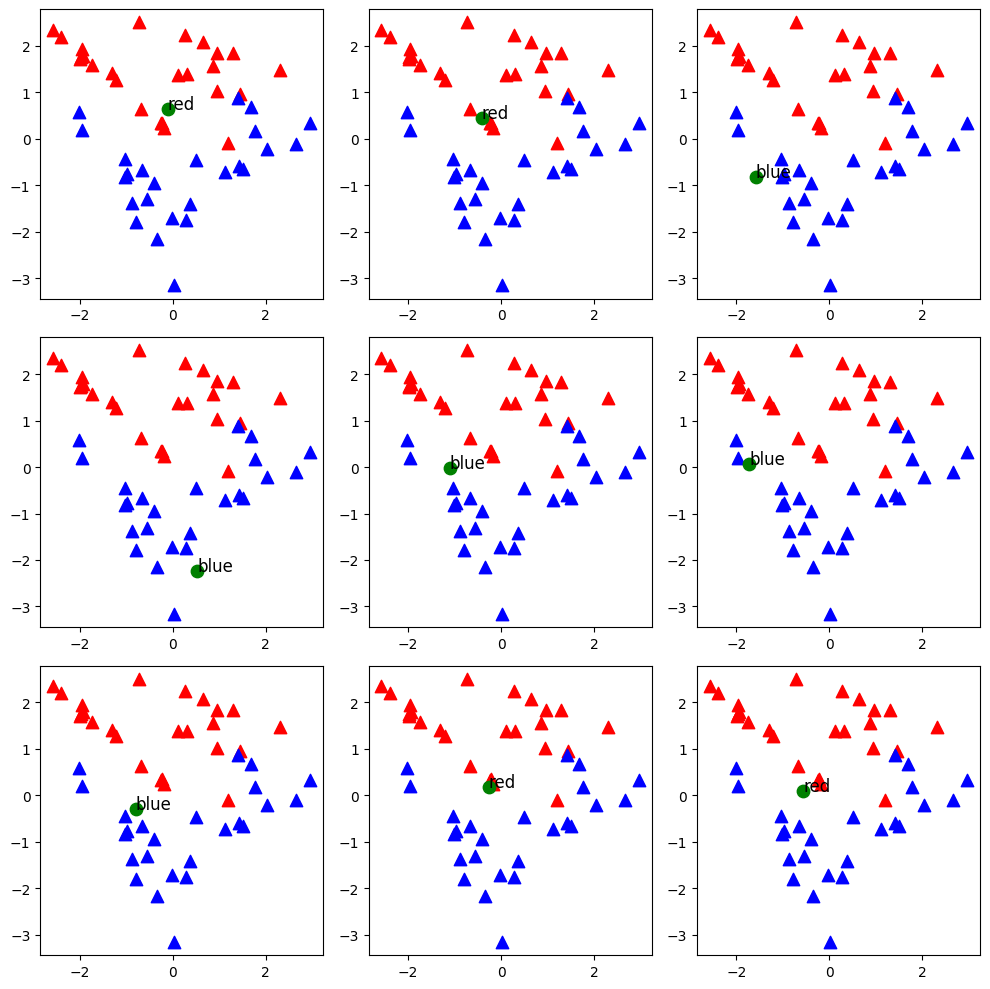

In [102]:
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(10, 10)

for i in range(9):
    # 더미 데이터 생성
    X, y = make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0, random_state=30)

    blue = X[y==0]
    red = X[y==1]

    # 랜덤한 새로운 점 생성
    newcomer = np.random.randn(1, 2)
    
    # K
    K = 3*(i//3+1)

    axes[i//3, i%3].scatter(red[:,0], red[:, 1], 80, 'r', '^')
    axes[i//3, i%3].scatter(blue[:,0], blue[:, 1], 80, 'b', '^')
    axes[i//3, i%3].scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')
    
    # n_neighbors=3
    knn = KNeighborsClassifier(n_neighbors=3)
    print(3*(i//3+1))
    knn.fit(X, y)
    pred = knn.predict(newcomer)
    
    # 표기
    axes[i//3, i%3].annotate('red' if pred==1 else 'blue', xy=newcomer[0], xytext=(newcomer[0]), fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
Image(url='https://git.io/Jtm25', width=400) 

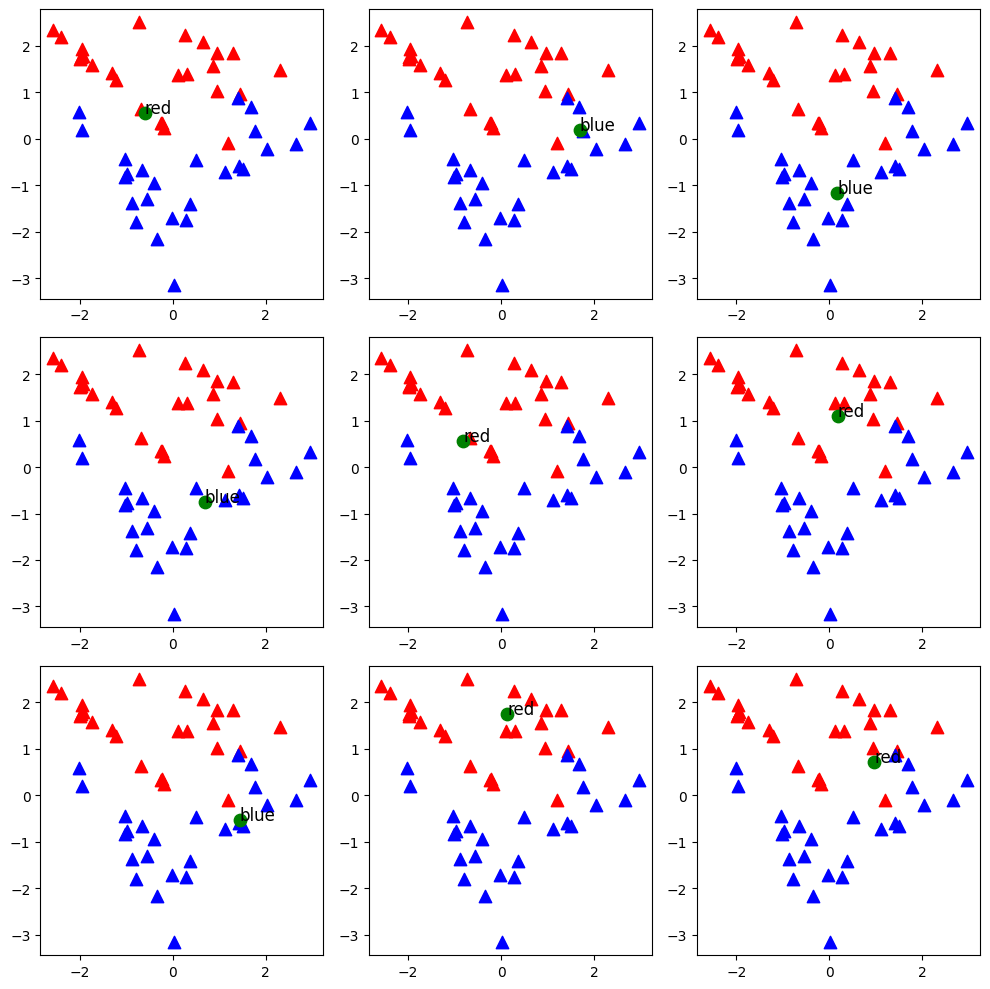

In [103]:
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(10, 10)

for i in range(9):
    # 더미 데이터 생성
    X, y = make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0, random_state=30)

    blue = X[y==0]
    red = X[y==1]

    # 랜덤한 새로운 점 생성
    newcomer = np.random.randn(1, 2)
    
    # K
    K = 3*(i//3+1)

    axes[i//3, i%3].scatter(red[:,0], red[:, 1], 80, 'r', '^')
    axes[i//3, i%3].scatter(blue[:,0], blue[:, 1], 80, 'b', '^')
    axes[i//3, i%3].scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')
    
    # n_neighbors=3
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X, y)
    pred = knn.predict(newcomer)
    
    # 표기
    axes[i//3, i%3].annotate('red' if pred==1 else 'blue', xy=newcomer[0], xytext=(newcomer[0]), fontsize=12)

plt.tight_layout()
plt.show()

0.9777777777777777


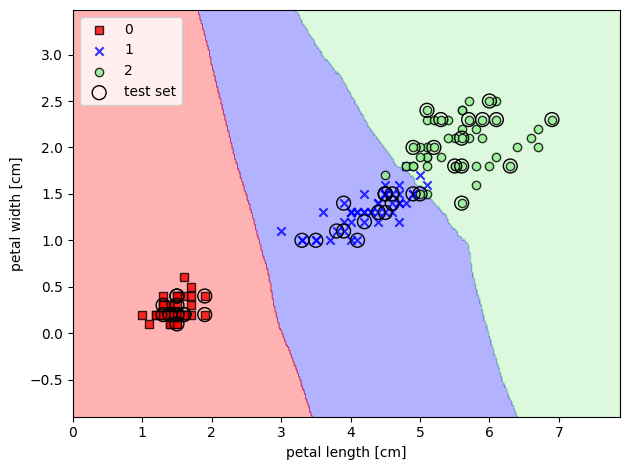

In [109]:
# 직접 변경해보기 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 1. 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target

# 2. 데이터 split 및 처리 (전체 4개 차원 중에 petal width, petal length 2개만 사용)
X_train, X_test, y_train, y_test = train_test_split(X[:, 2:], y, random_state=121, test_size=0.3, stratify=y, shuffle=True)

# 3. KNN분류 모델 생성 
knn_clf = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2) # p=2이면 유클리드 거리, p-1이면 맨하탄거리를 의미합니다 

# 4. KNN분류 모델 학습
knn_clf.fit(X_train, y_train)

# 5. 성능 측정
print(knn_clf.score(X_test, y_test)) # 정확도

# 6. 결정 경계 확인 
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=knn_clf,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
